# LSTM for Time Series Prediction

In this notebook, we will demonstrate how to use Long Short-Term Memory (LSTM) neural networks for time series prediction.


This notebook, when executed, will:

1. Load and visualize the Airline Passengers dataset.
2. Preprocess the data by normalizing it and splitting it into training and testing sets.
3. Create input-output pairs for training/testing with a certain timestep.
4. Build an LSTM model and train it on the prepared data.
5. Evaluate the model by computing its RMSE on the training and testing data.
6. Visualize the true data vs. the model's predictions.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2025-09-26 14:31:56.092938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-26 14:31:56.093636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-26 14:31:56.096051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-26 14:31:56.102368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758879116.113685  392862 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758879116.11

## Data Preparation

First, let's load and visualize the Airline Passengers dataset.


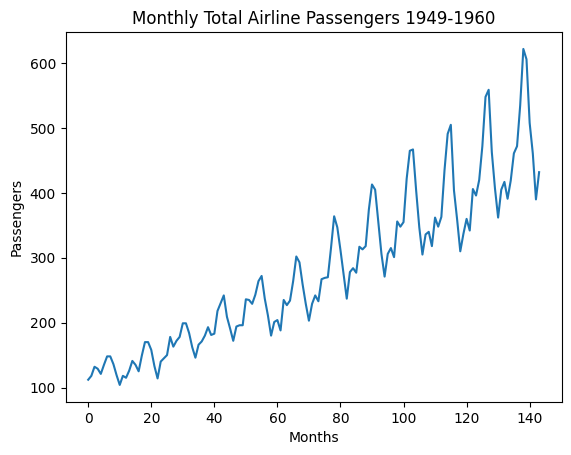

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
plt.plot(dataframe)
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("Monthly Total Airline Passengers 1949-1960")
plt.show()

In [7]:
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


### Data Preprocessing

Before training an LSTM model, we need to preprocess our data. This involves scaling our data and converting it into the right shape.


In [3]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe.values.astype('float32'))

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


### Create Dataset Matrix

This utility function creates a dataset matrix. Given data, and choosing a certain time step, it will create input-output pairs.


In [8]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1, choosing a timestep of 3
look_back = 3 # timestamp of 3 months
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## LSTM Model Building & Training

In [9]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2025-09-26 14:36:34.716170: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/tk-lpt-648/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 8ms/step - loss: 0.0066
Epoch 2/100
92/92 - 0s - 2ms/step - loss: 0.0045
Epoch 3/100
92/92 - 0s - 1ms/step - loss: 0.0040
Epoch 4/100
92/92 - 0s - 1ms/step - loss: 0.0037
Epoch 5/100
92/92 - 0s - 1ms/step - loss: 0.0034
Epoch 6/100
92/92 - 0s - 1ms/step - loss: 0.0036
Epoch 7/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 8/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 9/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 10/100
92/92 - 0s - 1ms/step - loss: 0.0034
Epoch 11/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 12/100
92/92 - 0s - 2ms/step - loss: 0.0034
Epoch 13/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 14/100
92/92 - 0s - 1ms/step - loss: 0.0034
Epoch 15/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 16/100
92/92 - 0s - 1ms/step - loss: 0.0032
Epoch 17/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 18/100
92/92 - 0s - 2ms/step - loss: 0.0033
Epoch 19/100
92/92 - 0s - 1ms/step - loss: 0.0033
Epoch 20/100
92/92 - 0s - 1ms/step - loss: 0.0031
Epoch 21/100
92/92 - 

## Model Evaluation

In [10]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
trainScore = np.sqrt(((trainPredict-y_train)**2).mean())
testScore = np.sqrt(((testPredict-y_test)**2).mean())
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Train Score: 96.46 RMSE
Test Score: 100.75 RMSE


## Visualizing Predictions

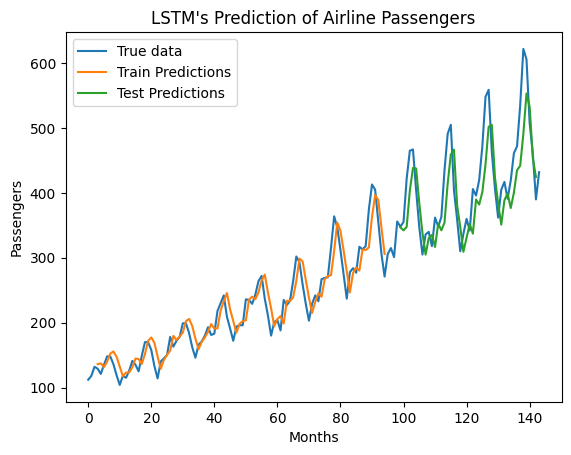

In [11]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="True data")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("LSTM's Prediction of Airline Passengers")
plt.legend()
plt.show()

Good Luck and Keep Learning!